In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

url = "https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv"
titanic_df = pd.read_csv(url)

features = ['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare']
target = 'Survived'

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

X = titanic_df[features]
y = titanic_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")


Accuracy on the test set: 0.7542


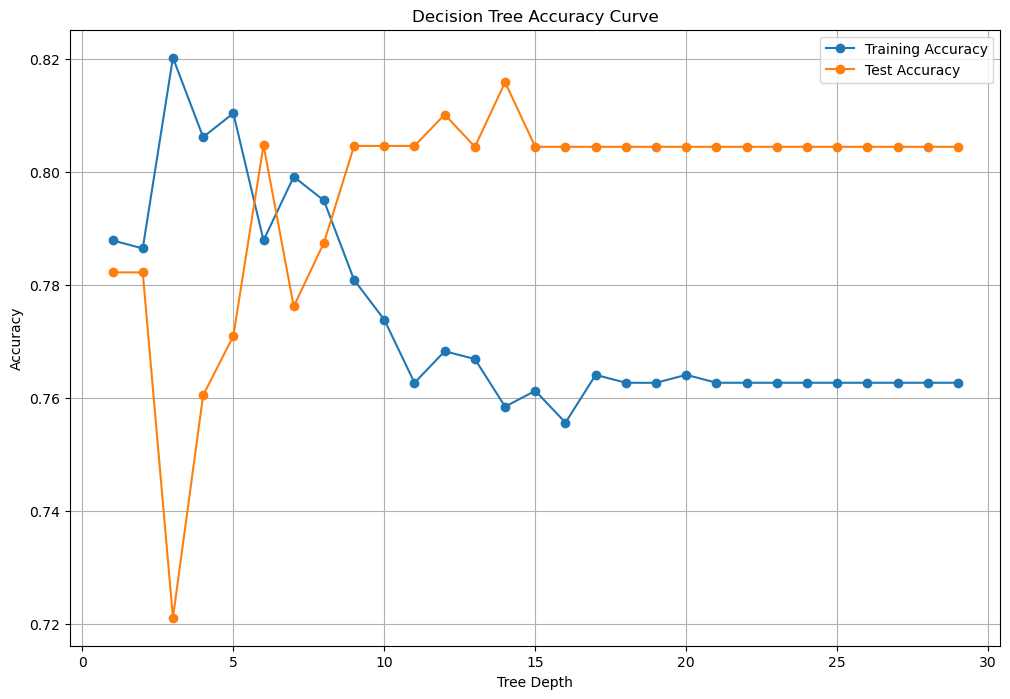

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


max_depths = np.arange(1, 30)
train_accuracies, test_accuracies = [], []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    train_accuracy = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    test_accuracy = np.mean(cross_val_score(model, X_test, y_test, cv=5))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(12, 8))
plt.plot(max_depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy Curve')
plt.legend()
plt.grid(True)
plt.show()


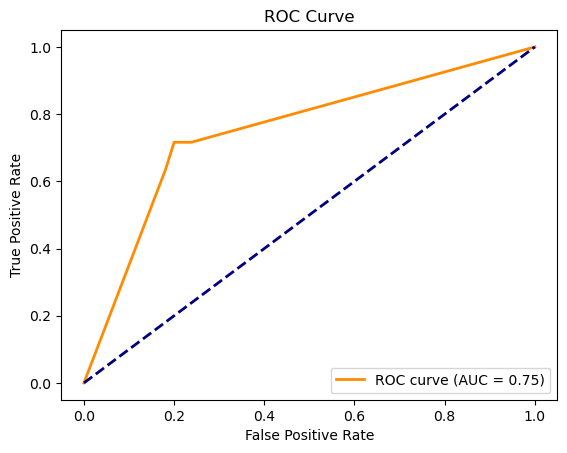

In [32]:
from sklearn.metrics import roc_curve, auc

y_scores = decision_tree_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


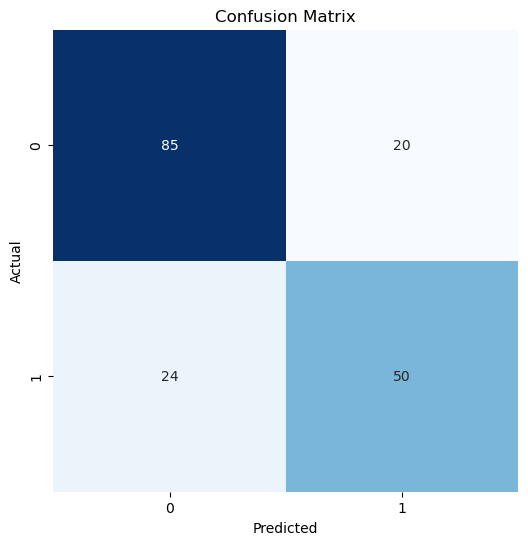

In [43]:
y_pred = decision_tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<h4>Basic random forest</h4>

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

url = "https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv"
titanic_df = pd.read_csv(url)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})


titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)

X = titanic_df[features]
y = titanic_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")


Accuracy on the test set: 0.8212


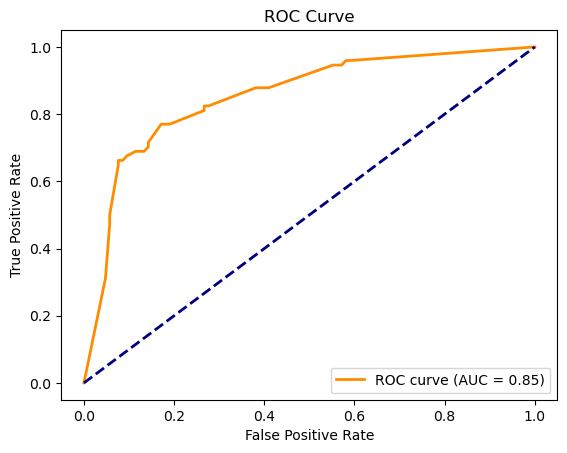

In [17]:
from sklearn.metrics import roc_curve, auc

y_scores = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


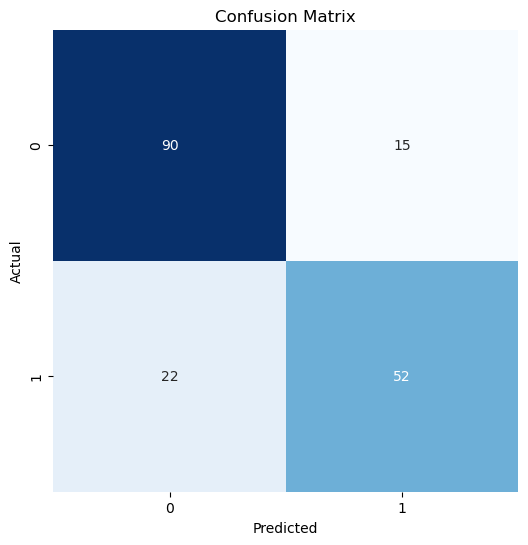

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = random_forest_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<h4>Adaboost</h4>

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

param_grid = {'n_estimators': [50, 100, 150, 200, 250]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Number of Trees:", grid_search.best_params_['n_estimators'])


Best Number of Trees: 150


In [14]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

url = "https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv"
titanic_df = pd.read_csv(url)

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'


titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})


titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


X = titanic_df[features]
y = titanic_df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


base_model = RandomForestClassifier(n_estimators=150, random_state=42)


adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)


adaboost_model.fit(X_train, y_train)


y_pred_adaboost = adaboost_model.predict(X_test)


accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Accuracy on the test set with AdaBoost: {accuracy_adaboost:.4f}")


Accuracy on the test set with AdaBoost: 0.8324


<h4>Tuning</h4>

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

num_trees_list = [50, 100, 150, 200, 250]

for num_trees in num_trees_list:
    rf_model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
    cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
    print(f"Number of Trees: {num_trees}, Mean Accuracy: {cross_val_scores.mean():.4f}")


Number of Trees: 50, Mean Accuracy: 0.8033
Number of Trees: 100, Mean Accuracy: 0.8019
Number of Trees: 150, Mean Accuracy: 0.8090
Number of Trees: 200, Mean Accuracy: 0.8062
Number of Trees: 250, Mean Accuracy: 0.8047


In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

num_trees_list = [50, 100, 150, 200, 250]

for num_trees in num_trees_list:
    base_model = RandomForestClassifier(n_estimators=100, random_state=42)
    ada_model = AdaBoostClassifier(base_model, n_estimators=num_trees, random_state=42)
    cross_val_scores = cross_val_score(ada_model, X_train, y_train, cv=5)
    print(f"Number of Trees: {num_trees}, Mean Accuracy: {cross_val_scores.mean():.4f}")


Number of Trees: 50, Mean Accuracy: 0.8132
Number of Trees: 100, Mean Accuracy: 0.8160
Number of Trees: 150, Mean Accuracy: 0.8104
Number of Trees: 200, Mean Accuracy: 0.8146
Number of Trees: 250, Mean Accuracy: 0.8118


<h3> Gradient Boosting</h3>

In [100]:

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


url = "https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv"
titanic_df = pd.read_csv(url)


features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target = 'Survived'


titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})


titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


X = titanic_df[features]
y = titanic_df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_forest_model = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


base_model = RandomForestClassifier(n_estimators=200, random_state=42)
adaboost_model = AdaBoostClassifier(base_model, n_estimators=150, random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")


xgboost_model = XGBClassifier(n_estimators=50, random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
print(f"XGBoost Accuracy: {accuracy_xgboost:.4f}")

lgbm_model = LGBMClassifier(n_estimators=40, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")



Random Forest Accuracy: 0.7933
AdaBoost Accuracy: 0.8268
XGBoost Accuracy: 0.8156
LightGBM Accuracy: 0.8268


In [62]:
cross_val_scores1 = cross_val_score(random_forest_model, X_train, y_train, cv=10)
print(f" Random Forest: {cross_val_scores1}")
cross_val_scores2 = cross_val_score(adaboost_model, X_train, y_train, cv=10)
print(f" AdaBoost: {cross_val_scores2}")
cross_val_scores3 = cross_val_score( xgboost_model ,X_train, y_train, cv=10)
print(f" XGBoost: {cross_val_scores3}")
cross_val_scores4 = cross_val_score(lgbm_model, X_train, y_train, cv=10)
print(f" LightBGM: {cross_val_scores4}")


 Random Forest: [0.84722222 0.77777778 0.76056338 0.87323944 0.81690141 0.77464789
 0.8028169  0.78873239 0.78873239 0.83098592]
 AdaBoost: [0.77777778 0.76388889 0.76056338 0.88732394 0.78873239 0.76056338
 0.78873239 0.78873239 0.78873239 0.83098592]
 XGBoost: [0.80555556 0.80555556 0.74647887 0.85915493 0.81690141 0.74647887
 0.81690141 0.83098592 0.81690141 0.85915493]
 LightBGM: [0.80555556 0.81944444 0.74647887 0.90140845 0.85915493 0.77464789
 0.81690141 0.84507042 0.81690141 0.85915493]


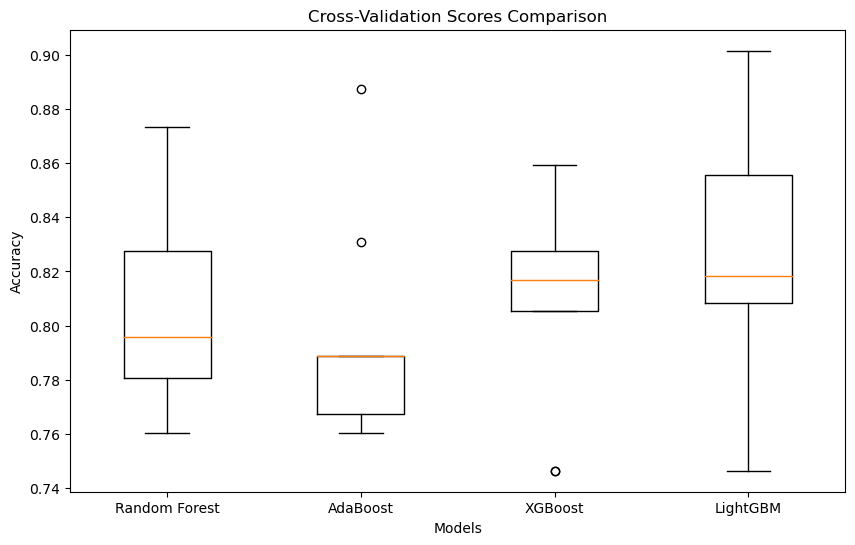

In [63]:
plt.figure(figsize=(10, 6))
plt.boxplot([cross_val_scores1, cross_val_scores2, cross_val_scores3, cross_val_scores4], labels=['Random Forest', 'AdaBoost', 'XGBoost', 'LightGBM'])
plt.title('Cross-Validation Scores Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

<h4>ROC curves<h4>

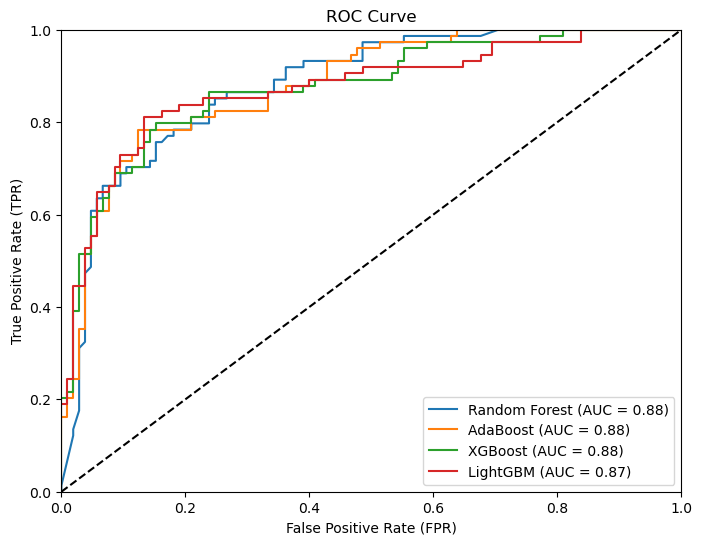

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_rf_proba = random_forest_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

y_pred_adaboost_proba = adaboost_model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_pred_adaboost_proba)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

y_pred_xgboost_proba = xgboost_model.predict_proba(X_test)[:, 1]
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, y_pred_xgboost_proba)
roc_auc_xgboost = auc(fpr_xgboost, tpr_xgboost)


y_pred_lgbm_proba = lgbm_model.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_pred_lgbm_proba)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})')
plt.plot(fpr_xgboost, tpr_xgboost, label=f'XGBoost (AUC = {roc_auc_xgboost:.2f})')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_lgbm:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


<h4>tuning</h4>

In [18]:

from lightgbm import LGBMClassifier


xgboost_model = XGBClassifier(random_state=42)
param_grid_xgboost = {'n_estimators': [50, 100, 150, 200, 250]}

grid_search_xgboost = GridSearchCV(xgboost_model, param_grid_xgboost, cv=5)
grid_search_xgboost.fit(X_train, y_train)

print("XGBoost Best Number of Trees:", grid_search_xgboost.best_params_['n_estimators'])


lgbm_model = LGBMClassifier(random_state=42)
param_grid_lgbm = {'n_estimators': [50, 100, 150, 200, 250]}

grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5)
grid_search_lgbm.fit(X_train, y_train)

print("LightGBM Best Number of Trees:", grid_search_lgbm.best_params_['n_estimators'])


XGBoost Best Number of Trees: 50
LightGBM Best Number of Trees: 50


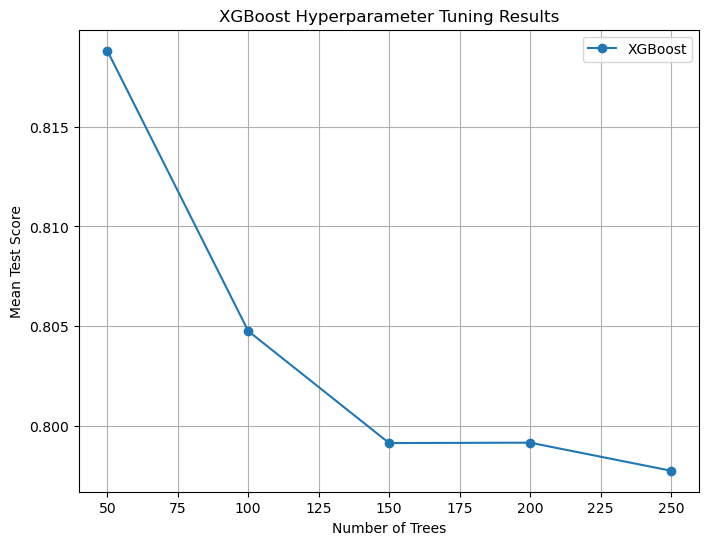

XGBoost Best Number of Trees: 50


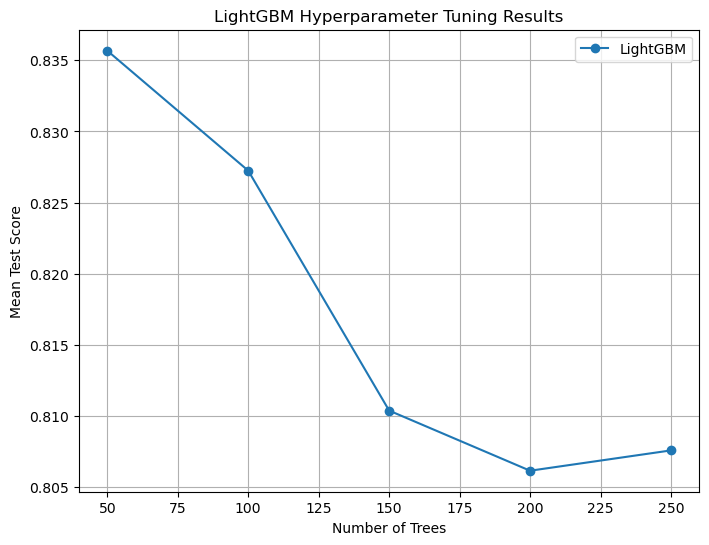

LightGBM Best Number of Trees: 50


In [101]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# XGBoost Hyperparameter Tuning
xgboost_model = XGBClassifier(random_state=42)
param_grid_xgboost = {'n_estimators': [50, 100, 150, 200, 250]}

grid_search_xgboost = GridSearchCV(xgboost_model, param_grid_xgboost, cv=5)
grid_search_xgboost.fit(X_train, y_train)

# Plotting XGBoost results
plt.figure(figsize=(8, 6))
plt.plot(param_grid_xgboost['n_estimators'], grid_search_xgboost.cv_results_['mean_test_score'], marker='o', label='XGBoost')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Test Score')
plt.title('XGBoost Hyperparameter Tuning Results')
plt.legend()
plt.grid(True)
plt.show()

print("XGBoost Best Number of Trees:", grid_search_xgboost.best_params_['n_estimators'])

# LightGBM Hyperparameter Tuning
lgbm_model = LGBMClassifier(random_state=42)
param_grid_lgbm = {'n_estimators': [50, 100, 150, 200, 250]}

grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5)
grid_search_lgbm.fit(X_train, y_train)

# Plotting LightGBM results
plt.figure(figsize=(8, 6))
plt.plot(param_grid_lgbm['n_estimators'], grid_search_lgbm.cv_results_['mean_test_score'], marker='o', label='LightGBM')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Test Score')
plt.title('LightGBM Hyperparameter Tuning Results')
plt.legend()
plt.grid(True)
plt.show()

print("LightGBM Best Number of Trees:", grid_search_lgbm.best_params_['n_estimators'])


<h4>Plot for NN</h4>

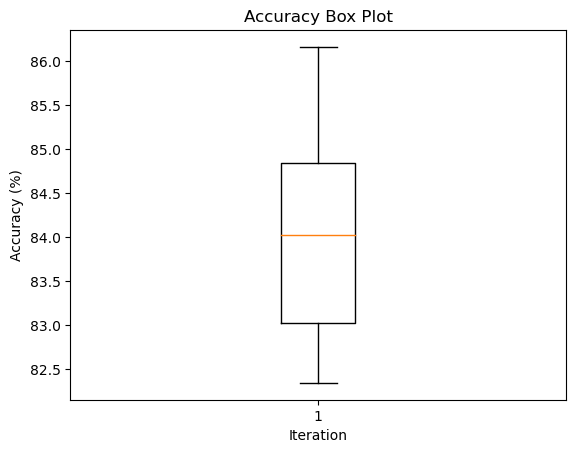

In [19]:
import matplotlib.pyplot as plt

iteration = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
accuracy_values = [82.38, 84.07, 84.25, 84.02, 82.34, 86.16, 85.42, 82.50, 85.80, 83.54, 83.89]

plt.boxplot(accuracy_values)
plt.title('Accuracy Box Plot')
plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.show()

